In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [100]:
df = pd.read_parquet('df_reponse_daily_train.parquet')
df = df.reset_index()

In [156]:
df_s = df[['time','stock_id','price']]
df_series = df_s.pivot(index='time', columns='stock_id')

stockids = ['stock_'+ str(id) for id in df_series.reset_index()['price'].columns]
df_clean = df_series.droplevel('stock_id', axis=1)
df_clean.columns = stockids

In [157]:
df_clean.head()

,stock_1,stock_2,stock_4,stock_5,stock_6,stock_7,stock_8,stock_9,stock_10,stock_11,...,stock_603987,stock_603988,stock_603989,stock_603990,stock_603991,stock_603993,stock_603996,stock_603997,stock_603998,stock_603999
time,,,,,,,,,,,,,,,,,,,,,
2010-01-04 10:00:00,24.25,10.720141,NaN,5.98,11.282970,7.02,NaN,11.482411,11.97,16.282148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 10:00:00,23.09,10.338355,NaN,5.88,10.840106,6.90,NaN,11.156147,11.55,16.052606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06 10:00:00,22.77,10.278073,NaN,6.14,10.809910,7.25,NaN,10.945653,11.56,15.501707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07 10:00:00,22.74,10.338355,NaN,5.91,10.729390,7.15,NaN,10.871981,11.71,15.562918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08 10:00:00,22.70,10.408684,NaN,5.88,10.981017,6.99,NaN,11.513985,11.27,15.593523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
#statistic for non-null rows
df_clean.count().describe()

count    3459.000000
mean     1299.975716
std       654.785213
min         1.000000
25%       656.000000
50%      1625.000000
75%      1818.000000
max      1920.000000
dtype: float64

In [178]:
#select only stocks that have more than 1000 days data
df_filtered = df_clean.loc[:, df_clean.count() > 1000]
df_filtered.head()

,stock_1,stock_2,stock_4,stock_5,stock_6,stock_7,stock_8,stock_9,stock_10,stock_11,...,stock_603008,stock_603077,stock_603123,stock_603128,stock_603167,stock_603333,stock_603366,stock_603399,stock_603766,stock_603993
time,,,,,,,,,,,,,,,,,,,,,
2010-01-04 10:00:00,24.25,10.720141,NaN,5.98,11.282970,7.02,NaN,11.482411,11.97,16.282148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 10:00:00,23.09,10.338355,NaN,5.88,10.840106,6.90,NaN,11.156147,11.55,16.052606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06 10:00:00,22.77,10.278073,NaN,6.14,10.809910,7.25,NaN,10.945653,11.56,15.501707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07 10:00:00,22.74,10.338355,NaN,5.91,10.729390,7.15,NaN,10.871981,11.71,15.562918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08 10:00:00,22.70,10.408684,NaN,5.88,10.981017,6.99,NaN,11.513985,11.27,15.593523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


stock_603167


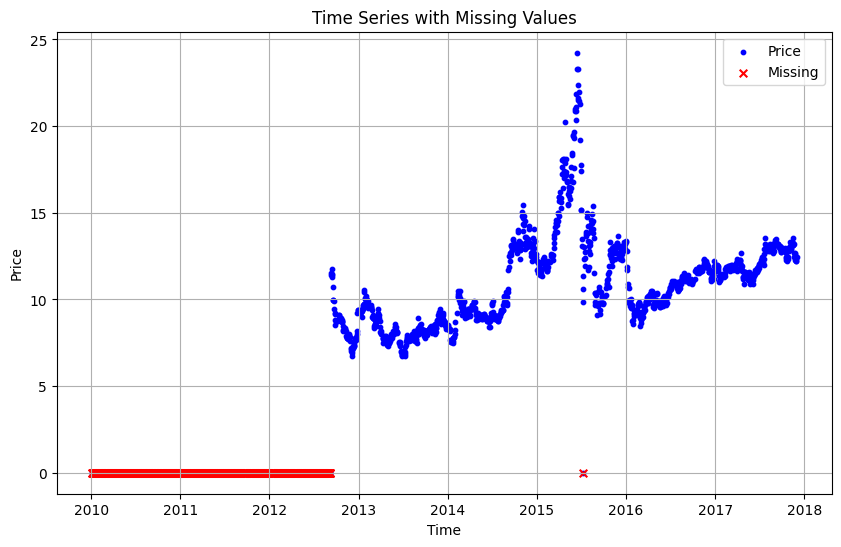

In [194]:
#generate the plot of a random time series
rand_index = randint(0, len(['stock_'+ str(id) for id in df_filtered.columns]))
rand_col = df_filtered.columns[rand_index]
rand_series = df_filtered[rand_col]
print(rand_col)

rand_series = rand_series.fillna(0.000001)

plt.figure(figsize=(10, 6))
plt.scatter(rand_series.index, rand_series, marker='o', s=10, linestyle='-', color='blue', label='Price')
plt.scatter(rand_series[rand_series == 0.000001].index, rand_series[rand_series == 0.000001], marker='x', s=30, color='red', label='Missing')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Time Series with Missing Values')
plt.legend()
plt.grid(True)
plt.show()